In [8]:
# Import modules, data, variables
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

path_daily = '/home/jovyan/work/notebooks/data/2d9787bf36d04c9383e595d179f9298b/2d9787bf36d04c9383e595d179f9298b/data/contents/Daily/'

In [9]:
!pwd



/home/jovyan/work/notebooks/data/2d9787bf36d04c9383e595d179f9298b/2d9787bf36d04c9383e595d179f9298b/data/contents


In [10]:
date_rng = pd.date_range(start='10/14/2015', end='9/4/18', freq='D')
date_rng
df = pd.DataFrame(date_rng, columns=['date'])
#df['data'] = np.random.randint(0,100,size=(len(date_rng)))
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)


In [35]:

path_elev= '/home/jovyan/work/notebooks/data/2d9787bf36d04c9383e595d179f9298b/2d9787bf36d04c9383e595d179f9298b/data/contents/'
Elevation= np.genfromtxt(path_elev + 'Elevation.csv', delimiter=',',skip_header=1)

# Concatenate 2016, 2017, and 2018 timeseries of temperature at each monitoring location. 

,Time_Lapse1_2017_Tdaily,AirT_Lapse1_daily_mean_2017,Time_Lapse1_2018_Tdaily,AirT_Lapse1_daily_mean_2018,Tdaily_lapse1
datetime,,,,,
2018-08-31,NaN,NaN,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN,NaN,NaN
2018-09-02,NaN,NaN,NaN,NaN,NaN
2018-09-03,NaN,NaN,NaN,NaN,NaN
2018-09-04,NaN,NaN,NaN,NaN,NaN


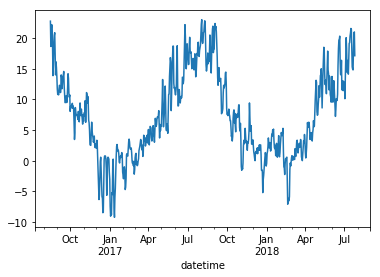

In [12]:
Lapse1_2017 = pd.read_csv(path_daily + 'Lapse1_data_2017_dailyT.csv')
Lapse1_2018 = pd.read_csv(path_daily + 'Lapse1_data_2018_dailyT.csv')
Lapse1_2017.columns = ['Time_Lapse1_2017_Tdaily', 'AirT_Lapse1_daily_mean_2017']
Lapse1_2018.columns = ['Time_Lapse1_2018_Tdaily', 'AirT_Lapse1_daily_mean_2018']

Lapse1_2017 = Lapse1_2017.set_index(pd.DatetimeIndex(Lapse1_2017['Time_Lapse1_2017_Tdaily']))
Lapse1_2018 = Lapse1_2018.set_index(pd.DatetimeIndex(Lapse1_2018['Time_Lapse1_2018_Tdaily']))

df_concat_Lapse1 = pd.concat([df, Lapse1_2017, Lapse1_2018], axis = 1,  join_axes = [df.index])
df_concat_Lapse1['Tdaily_lapse1'] = np.nan

temp_1 = df_concat_Lapse1['AirT_Lapse1_daily_mean_2017'].to_frame()
temp_2 = df_concat_Lapse1['AirT_Lapse1_daily_mean_2018'].to_frame()
temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']

df_concat_Lapse1['Tdaily_lapse1'] = temp_1.combine_first(temp_2)
df_concat_Lapse1.Tdaily_lapse1.plot()
df_concat_Lapse1.tail()


## Concatenate Lapse 2

In [ ]:
df_concat_Lapse2

,Tdaily_Lapse1,Time_Lapse2_2016_Tdaily,AirT_Lapse2_daily_mean_2016,Time_Lapse2_2018_Tdaily,AirT_Lapse2_daily_mean_2018,Tdaily_lapse2
datetime,,,,,,
2015-10-14,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-15,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-16,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-17,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-18,NaN,NaN,NaN,NaN,NaN,NaN


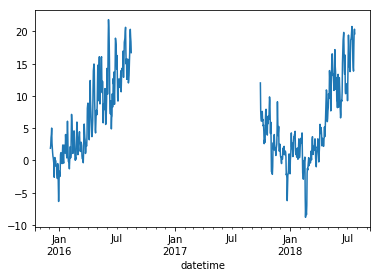

In [18]:
Lapse2_2016 = pd.read_csv(path_daily + 'Lapse2_data_2016_dailyT.csv')
Lapse2_2018 = pd.read_csv(path_daily + 'Lapse2_data_2018_dailyT.csv')
Lapse2_2016.columns = ['Time_Lapse2_2016_Tdaily', 'AirT_Lapse2_daily_mean_2016']

Lapse2_2018.columns = ['Time_Lapse2_2018_Tdaily', 'AirT_Lapse2_daily_mean_2018']

Lapse2_2016 = Lapse2_2016.set_index(pd.DatetimeIndex(Lapse2_2016['Time_Lapse2_2016_Tdaily']))
#Lapse2_2016 = Lapse2_2016.drop(['Time'], axis=1, inplace = True)

Lapse2_2018 = Lapse2_2018.set_index(pd.DatetimeIndex(Lapse2_2018['Time_Lapse2_2018_Tdaily']))
#Lapse2_2018 = Lapse2_2018.drop(['Time'], axis=1, inplace = True)

df_concat_Lapse2 = pd.concat([df, Lapse2_2016, Lapse2_2018], axis = 1,  join_axes = [df.index])
df_concat_Lapse2['Tdaily_lapse2'] = np.nan
#df_concat.AirT_Lapse2_daily_mean_2018.plot()
temp_1 = df_concat_Lapse2['AirT_Lapse2_daily_mean_2016'].to_frame()
temp_2 = df_concat_Lapse2['AirT_Lapse2_daily_mean_2018'].to_frame()
temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']

df_concat_Lapse2['Tdaily_lapse2'] = temp_1.combine_first(temp_2)
df_concat_Lapse2.Tdaily_lapse2.plot()
df_concat_Lapse2.head()

## Concatenate Lapse 4

,Tdaily_Lapse1,Time_Lapse4_2016_Tdaily,AirT_Lapse4_daily_mean_2016,Time_Lapse4_2017_Tdaily,AirT_Lapse4_daily_mean_2017,Time_Lapse4_2018_Tdaily,AirT_Lapse4_daily_mean_2018,Tdaily_lapse1,Tdaily_lapse4
datetime,,,,,,,,,
2015-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


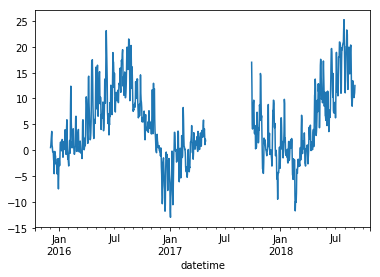

In [19]:
Lapse4_2016 = pd.read_csv(path_daily + 'Lapse4_data_2016_dailyT.csv')
Lapse4_2017 = pd.read_csv(path_daily + 'Lapse4_data_2017_dailyT.csv')
Lapse4_2018 = pd.read_csv(path_daily + 'Lapse4_data_2018_dailyT.csv')

Lapse4_2016.columns = ['Time_Lapse4_2016_Tdaily', 'AirT_Lapse4_daily_mean_2016']
Lapse4_2017.columns = ['Time_Lapse4_2017_Tdaily', 'AirT_Lapse4_daily_mean_2017']
Lapse4_2018.columns = ['Time_Lapse4_2018_Tdaily', 'AirT_Lapse4_daily_mean_2018']

Lapse4_2016 = Lapse4_2016.set_index(pd.DatetimeIndex(Lapse4_2016['Time_Lapse4_2016_Tdaily']))
Lapse4_2017 = Lapse4_2017.set_index(pd.DatetimeIndex(Lapse4_2017['Time_Lapse4_2017_Tdaily']))
Lapse4_2018 = Lapse4_2018.set_index(pd.DatetimeIndex(Lapse4_2018['Time_Lapse4_2018_Tdaily']))

df_concat_Lapse4 = pd.concat([df, Lapse4_2016, Lapse4_2017, Lapse4_2018], axis = 1,  join_axes = [df.index])
df_concat_Lapse4['Tdaily_lapse1'] = np.nan

temp_1 = df_concat_Lapse4['AirT_Lapse4_daily_mean_2016'].to_frame()
temp_2 = df_concat_Lapse4['AirT_Lapse4_daily_mean_2017'].to_frame()
temp_3 = df_concat_Lapse4['AirT_Lapse4_daily_mean_2018'].to_frame()

temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']
temp_3.columns = ['Tdaily']

df_concat_Lapse4['Tdaily_lapse4'] = temp_1.combine_first(temp_2).combine_first(temp_3)
#df_concat_Lapse4['Tdaily_lapse1'] = temp_2.combine_first(temp_3)

df_concat_Lapse4.Tdaily_lapse4.plot()
df_concat_Lapse4.head()

## Concatenate Lapse 5

,Tdaily_Lapse1,Time_Lapse5_2017_Tdaily,AirT_Lapse5_daily_mean_2017,Time_Lapse5_2018_Tdaily,AirT_Lapse5_daily_mean_2018,Tdaily_lapse5
datetime,,,,,,
2015-10-14,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-15,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-16,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-17,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-18,NaN,NaN,NaN,NaN,NaN,NaN


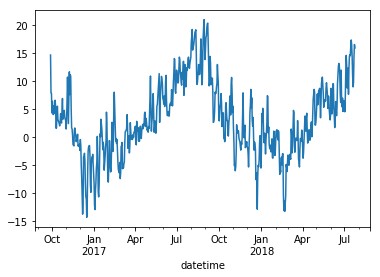

In [20]:
Lapse5_2017 = pd.read_csv(path_daily + 'Lapse5_data_2017_dailyT.csv')
Lapse5_2018 = pd.read_csv(path_daily + 'Lapse5_data_2018_dailyT.csv')
Lapse5_2017.columns = ['Time_Lapse5_2017_Tdaily', 'AirT_Lapse5_daily_mean_2017']
Lapse5_2018.columns = ['Time_Lapse5_2018_Tdaily', 'AirT_Lapse5_daily_mean_2018']

Lapse5_2017 = Lapse5_2017.set_index(pd.DatetimeIndex(Lapse5_2017['Time_Lapse5_2017_Tdaily']))
Lapse5_2018 = Lapse5_2018.set_index(pd.DatetimeIndex(Lapse5_2018['Time_Lapse5_2018_Tdaily']))

df_concat_Lapse5 = pd.concat([df, Lapse5_2017, Lapse5_2018], axis = 1,  join_axes = [df.index])
df_concat_Lapse5['Tdaily_lapse5'] = np.nan

temp_1 = df_concat_Lapse5['AirT_Lapse5_daily_mean_2017'].to_frame()
temp_2 = df_concat_Lapse5['AirT_Lapse5_daily_mean_2018'].to_frame()
temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']

df_concat_Lapse5['Tdaily_lapse5'] = temp_1.combine_first(temp_2)
df_concat_Lapse5.Tdaily_lapse5.plot()
df_concat_Lapse5.head()

## Concatenate Lapse 6

,Tdaily_Lapse1,Time_Lapse6_2016_Tdaily,AirT_Lapse6_daily_mean_2016,Time_Lapse6_2017_Tdaily,AirT_Lapse6_daily_mean_2017,Tdaily_lapse6
datetime,,,,,,
2015-10-14,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-15,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-16,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-17,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-18,NaN,NaN,NaN,NaN,NaN,NaN


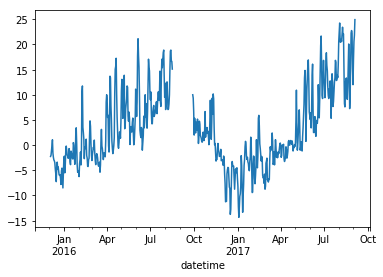

In [21]:
Lapse6_2017 = pd.read_csv(path_daily + 'Lapse6_data_2017_dailyT.csv')
Lapse6_2016 = pd.read_csv(path_daily + 'Lapse6_data_2016_dailyT.csv')
Lapse6_2017.columns = ['Time_Lapse6_2017_Tdaily', 'AirT_Lapse6_daily_mean_2017']
Lapse6_2016.columns = ['Time_Lapse6_2016_Tdaily', 'AirT_Lapse6_daily_mean_2016']

Lapse6_2017 = Lapse6_2017.set_index(pd.DatetimeIndex(Lapse6_2017['Time_Lapse6_2017_Tdaily']))
Lapse6_2016 = Lapse6_2016.set_index(pd.DatetimeIndex(Lapse6_2016['Time_Lapse6_2016_Tdaily']))

df_concat_Lapse6= pd.concat([df, Lapse6_2016, Lapse6_2017], axis = 1,  join_axes = [df.index])
df_concat_Lapse6['Tdaily_lapse6'] = np.nan

temp_1 = df_concat_Lapse6['AirT_Lapse6_daily_mean_2017'].to_frame()
temp_2 = df_concat_Lapse6['AirT_Lapse6_daily_mean_2016'].to_frame()
temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']

df_concat_Lapse6['Tdaily_lapse6'] = temp_1.combine_first(temp_2)
df_concat_Lapse6.Tdaily_lapse6.plot()
df_concat_Lapse6.head()

## Concatenate Lapse 7

,Tdaily_Lapse1,Time_Lapse7_2016_Tdaily,AirT_Lapse7_daily_mean_2016,Time_Lapse7_2017_Tdaily,AirT_Lapse7_daily_mean_2017,Time_Lapse7_2018_Tdaily,AirT_Lapse7_daily_mean_2018,Tdaily_lapse7
datetime,,,,,,,,
2015-10-14,NaN,2015-10-14,21.103500,NaN,NaN,NaN,NaN,21.103500
2015-10-15,NaN,2015-10-15,17.973625,NaN,NaN,NaN,NaN,17.973625
2015-10-16,NaN,2015-10-16,16.221125,NaN,NaN,NaN,NaN,16.221125
2015-10-17,NaN,2015-10-17,11.959500,NaN,NaN,NaN,NaN,11.959500
2015-10-18,NaN,2015-10-18,5.750250,NaN,NaN,NaN,NaN,5.750250


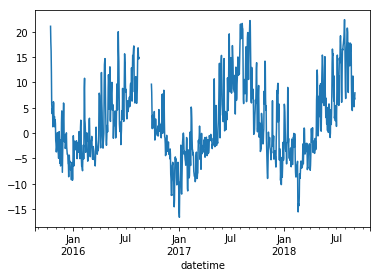

In [22]:
Lapse7_2016 = pd.read_csv(path_daily + 'Lapse7_data_2016_dailyT.csv')
Lapse7_2017 = pd.read_csv(path_daily + 'Lapse7_data_2017_dailyT.csv')
Lapse7_2018 = pd.read_csv(path_daily + 'Lapse7_data_2018_dailyT.csv')

Lapse7_2016.columns = ['Time_Lapse7_2016_Tdaily', 'AirT_Lapse7_daily_mean_2016']
Lapse7_2017.columns = ['Time_Lapse7_2017_Tdaily', 'AirT_Lapse7_daily_mean_2017']
Lapse7_2018.columns = ['Time_Lapse7_2018_Tdaily', 'AirT_Lapse7_daily_mean_2018']

Lapse7_2016 = Lapse7_2016.set_index(pd.DatetimeIndex(Lapse7_2016['Time_Lapse7_2016_Tdaily']))
Lapse7_2017 = Lapse7_2017.set_index(pd.DatetimeIndex(Lapse7_2017['Time_Lapse7_2017_Tdaily']))
Lapse7_2018 = Lapse7_2018.set_index(pd.DatetimeIndex(Lapse7_2018['Time_Lapse7_2018_Tdaily']))

df_concat_Lapse7 = pd.concat([df, Lapse7_2016, Lapse7_2017, Lapse7_2018], axis = 1,  join_axes = [df.index])
df_concat_Lapse7['Tdaily_lapse7'] = np.nan

temp_1 = df_concat_Lapse7['AirT_Lapse7_daily_mean_2016'].to_frame()
temp_2 = df_concat_Lapse7['AirT_Lapse7_daily_mean_2017'].to_frame()
temp_3 = df_concat_Lapse7['AirT_Lapse7_daily_mean_2018'].to_frame()

temp_1.columns = ['Tdaily']
temp_2.columns = ['Tdaily']
temp_3.columns = ['Tdaily']

df_concat_Lapse7['Tdaily_lapse7'] = temp_1.combine_first(temp_2).combine_first(temp_3)
#df_concat_Lapse4['Tdaily_lapse1'] = temp_2.combine_first(temp_3)

df_concat_Lapse7.Tdaily_lapse7.plot()
df_concat_Lapse7.head()

## Combine all timeseries of daily temperature into one table.

In [23]:
df_concat_Lapse2

,Tdaily_Lapse1,Time_Lapse2_2016_Tdaily,AirT_Lapse2_daily_mean_2016,Time_Lapse2_2018_Tdaily,AirT_Lapse2_daily_mean_2018,Tdaily_lapse2
datetime,,,,,,
2015-10-14,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-15,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-16,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-17,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-18,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-19,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-20,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-21,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-22,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#combine all

df_all = df
df_all['Tdaily_Lapse1'] = df_concat_Lapse1['Tdaily_lapse1']
df_all['Tdaily_Lapse2'] = df_concat_Lapse2['Tdaily_lapse2']
df_all['Tdaily_Lapse4'] = df_concat_Lapse4['Tdaily_lapse4']
df_all['Tdaily_Lapse5'] = df_concat_Lapse5['Tdaily_lapse5']
df_all['Tdaily_Lapse6'] = df_concat_Lapse6['Tdaily_lapse6']
df_all['Tdaily_Lapse7'] = df_concat_Lapse7['Tdaily_lapse7']

a = df_all.values
#a = df_all.isnull().any().any()
a  = a[~np.isnan(a)]
#df_all.combine(df_all, lambda s: s if isnan(s) else np.NaN)
a

array([21.1035  , 17.973625, 16.221125, ...,  6.640625, 12.5     ,
        7.9442  ])

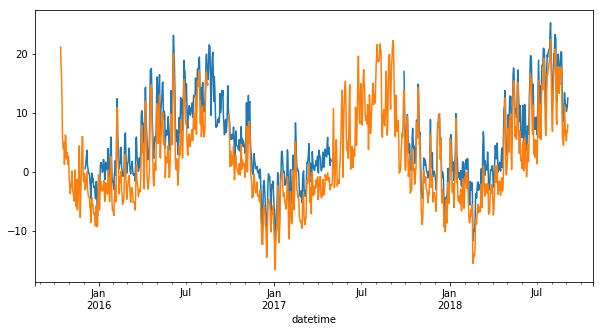

In [25]:
fig1, ax1=plt.subplots(1,1,figsize=(10, 5))
df_all['Tdaily_Lapse4'].plot()
df_all['Tdaily_Lapse7'].plot()


df_all.to_csv('All_sites_dailyT.csv')
#df_all.plot()

In [26]:
one_year = df_all['7/1/2017':'7/1/2018']
print(len(one_year))
#print(one_year)

366


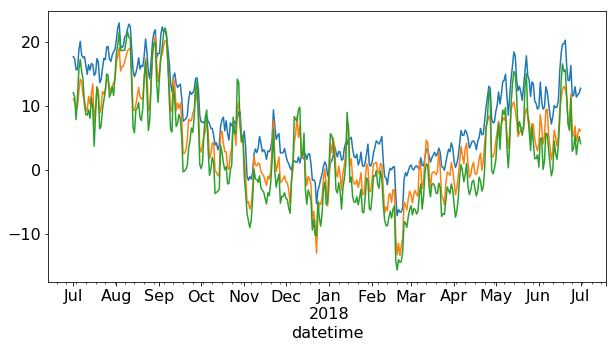

In [48]:
fig2, ax2=plt.subplots(1,1,figsize=(10, 5))
#one_year['Tdaily_Lapse6'].plot()  partial data
one_year['Tdaily_Lapse1'].plot()
#one_year['Tdaily_Lapse2'].plot()  missing part of July
#one_year['Tdaily_Lapse4'].plot() missing part of July
one_year['Tdaily_Lapse5'].plot() 
one_year['Tdaily_Lapse7'].plot()
one_year.to_csv('All_sites_dailyT.csv')
#df_all.plot()

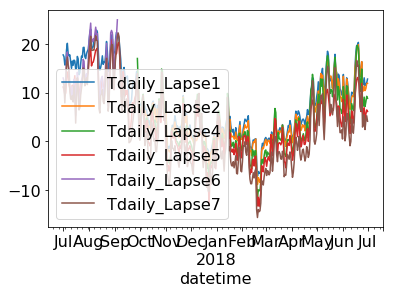

In [49]:
one_year.plot()
mean_T = one_year.mean()

In [30]:
mean_T.Tdaily_Lapse1


8.012933553430386

In [36]:
elev_Lapse1=np.array((Elevation[0][1]), dtype='float64')
#elev_Lapse2=np.array((Elevation[1][1]), dtype='float64')
#elev_Lapse4=np.array((Elevation[2][1]), dtype='float64')
elev_Lapse5=np.array((Elevation[3][1]), dtype='float64')
#elev_Lapse6=np.array((Elevation[4][1]), dtype='float64')
elev_Lapse7=np.array((Elevation[5][1]), dtype='float64')


In [37]:
elevations_km=np.array([elev_Lapse1/1000, elev_Lapse2/1000, elev_Lapse4/1000, elev_Lapse5/1000, 
                        elev_Lapse6/1000, elev_Lapse7/1000]) 

In [50]:
elevations_km_17 = np.array([elev_Lapse1/1000, elev_Lapse7/1000]) 
elevations_km_157 = np.array([elev_Lapse1/1000, elev_Lapse5/1000, elev_Lapse7/1000]) 

In [51]:
mean_T_17= np.array([mean_T.Tdaily_Lapse1, mean_T.Tdaily_Lapse7]) 
mean_T_157= np.array([mean_T.Tdaily_Lapse1, mean_T.Tdaily_Lapse5, mean_T.Tdaily_Lapse7]) 

In [56]:
print(elevations_km_17)
print(mean_T_17)
print(elevations_km_157)
print(mean_T_157)

[0.50687    1.74306614]
[8.01293355 2.77108094]
[0.50687    1.28649802 1.74306614]
[8.01293355 4.20093452 2.77108094]


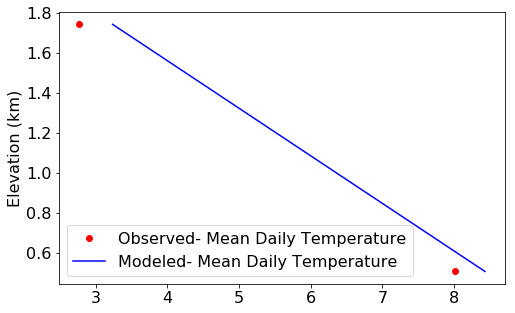

In [57]:
fig15=plt.figure(figsize=(8, 5))

LR_plot=-4.2
b_plot=10.559

plt.plot(mean_T_17, elevations_km_17,'ro',label='Observed- Mean Daily Temperature')
plt.plot(elevations_km*LR_plot+b_plot, elevations_km,'b-',label='Modeled- Mean Daily Temperature')
#plt.xlabel('Temperature (deg C)')
plt.ylabel('Elevation (km)')
plt.legend(loc='best')
#plt.title('Average Annual Lapse Rate of Daily Mean Temperature = -4.45 deg C/km')
#text(0.36, 0.9,'a)Average annual lapse rate of daily mean temperature = -4.45 deg C/km in water year 2016', ha='center', va='center', transform=ax4.transAxes, fontsize=10)

plt.rcParams.update({'font.size': 16})


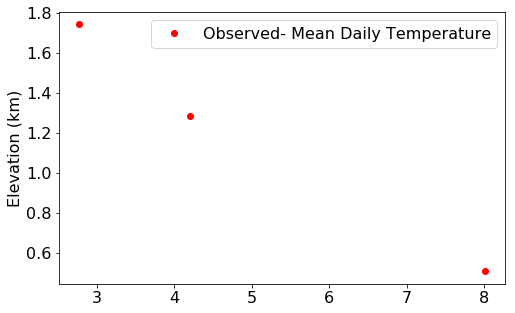

In [53]:
fig15=plt.figure(figsize=(8, 5))

LR_plot=-4.8
b_plot=10.559

plt.plot(mean_T_157, elevations_km_157,'ro',label='Observed- Mean Daily Temperature')
#plt.plot(elevations_km*LR_plot+b_plot, elevations_km,'b-',label='Modeled- Mean Daily Temperature')
#plt.xlabel('Temperature (deg C)')
plt.ylabel('Elevation (km)')
plt.legend(loc='best')
#plt.title('Average Annual Lapse Rate of Daily Mean Temperature = -4.45 deg C/km')
#text(0.36, 0.9,'a)Average annual lapse rate of daily mean temperature = -4.45 deg C/km in water year 2016', ha='center', va='center', transform=ax4.transAxes, fontsize=10)

plt.rcParams.update({'font.size': 16})


In [98]:
ndays = len(one_year)
x = np.array([mean_T.Tdaily_Lapse1, mean_T.Tdaily_Lapse7])
y = np.array([elev_Lapse1/1000, elev_Lapse7/1000])
print(x)
print(y)
sl = (mean_T.Tdaily_Lapse7 - mean_T.Tdaily_Lapse1)/(elev_Lapse7/1000 -elev_Lapse1/1000)
print(sl)

[ 8.01293355  2.77108094]
[ 0.502       1.74306614]
-4.22366903052


In [58]:
one_month = df_all['5/1/2018':'5/31/2018']
print(len(one_month))
#print(one_year)

31


Tdaily_Lapse1    12.984738
Tdaily_Lapse2    12.083333
Tdaily_Lapse4    10.548387
Tdaily_Lapse5     6.914016
Tdaily_Lapse6          NaN
Tdaily_Lapse7     7.142617
dtype: float64


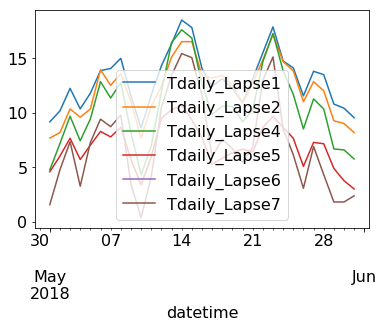

In [60]:
one_month.plot()
mean_T_month = one_month.mean()
print(mean_T_month)

In [109]:
mean_T_month

Tdaily_Lapse1    5.857891
Tdaily_Lapse2    4.650538
Tdaily_Lapse4    3.282258
Tdaily_Lapse5    1.895056
Tdaily_Lapse6         NaN
Tdaily_Lapse7   -0.531685
dtype: float64

In [114]:
elevations_km_mo = np.array([elev_Lapse1/1000, elev_Lapse2/1000, elev_Lapse4/1000, elev_Lapse5/1000, 
                        elev_Lapse7/1000]) 


In [116]:
mean_T_month = mean_T_month[~np.isnan(mean_T_month)]

In [117]:
mean_T_month

Tdaily_Lapse1    5.857891
Tdaily_Lapse2    4.650538
Tdaily_Lapse4    3.282258
Tdaily_Lapse5    1.895056
Tdaily_Lapse7   -0.531685
dtype: float64

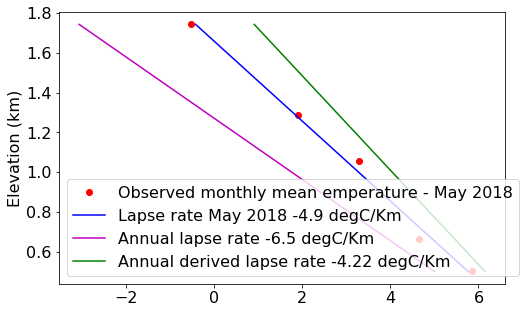

In [143]:
sl_mo, int_mo, r_value, p_value, std_err = stats.linregress(elevations_km_mo, mean_T_month)

fig17=plt.figure(figsize=(8, 5))

LR_plot = sl_mo
b_plot  = int_mo

plt.plot(mean_T_month, elevations_km_mo, 'ro',label='Observed monthly mean emperature - May 2018')
plt.plot(elevations_km_mo * LR_plot + b_plot, elevations_km_mo,'b-',label='Lapse rate May 2018 -4.9 degC/Km')
plt.plot(elevations_km_mo * (-6.5) + b_plot, elevations_km_mo,'m-',label='Annual lapse rate -6.5 degC/Km')
plt.plot(elevations_km_mo * (-4.22) + b_plot, elevations_km_mo,'g-',label='Annual derived lapse rate -4.22 degC/Km')
#plt.xlabel('Temperature (deg C)')
plt.ylabel('Elevation (km)')
plt.legend(loc='lower left')
#plt.title('Average Annual Lapse Rate of Daily Mean Temperature = -4.45 deg C/km')
#text(0.36, 0.9,'a)Average annual lapse rate of daily mean temperature = -4.45 deg C/km in water year 2016', ha='center', va='center', transform=ax4.transAxes, fontsize=10)
fig.suptitle('Air temperature lapse rates across the domain, May 2018', fontsize=16)
plt.rcParams.update({'font.size': 16})

In [120]:
sl_mo

-4.9832537148883276